# Gender Classifier - by Student Performance
A simple example for a binary classfier.  
Use the dataset from: https://www.kaggle.com/spscientist/students-performance-in-exams  

We will use SGD Classifier(sklearn.linear_model) and MLP's Classifier(keras.models.Sequential)

Data preparation:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("csv_data/StudentsPerformance.csv")

#binary category encoded to 0 and 1
ordinal_encoder = OrdinalEncoder()
data[['gender','lunch','test preparation course']] = ordinal_encoder.fit_transform(data[['gender','lunch','test preparation course']])

#normalize the scores to range 0-1
data[["math score","reading score","writing score"]] = data[["math score","reading score","writing score"]] / 100.

#category encoded using one-hot encoder
race_ethnicit_encoder = OneHotEncoder()
race_ethnicit_data = np.array(race_ethnicit_encoder.fit_transform(data[['race/ethnicity']]).toarray()).T
for col,i in zip(race_ethnicit_data,range(len(race_ethnicit_data))):
    data['race/ethnicity'+str(i)] = col
    
parentaleducation_encoder = OneHotEncoder()
parentaleducation_data = np.array(parentaleducation_encoder.fit_transform(data[['parental level of education']]).toarray()).T
for col,i in zip(parentaleducation_data,range(len(parentaleducation_data))):
    data['parentaleducation'+str(i)] = col

data = data.drop(['race/ethnicity','parental level of education'],axis=1)

#splitting the data
train,test = train_test_split(data, test_size=0.2, random_state=42)

Ytrain = np.c_[np.array(train.iloc[:,0]),np.array(1-train.iloc[:,0])]
Xtrain = train.iloc[:,1:]
Ytest = np.c_[np.array(test.iloc[:,0]),np.array(1-test.iloc[:,0])]
Xtest = test.iloc[:,1:]

data.head()

,gender,lunch,test preparation course,math score,reading score,writing score,race/ethnicity0,race/ethnicity1,race/ethnicity2,race/ethnicity3,race/ethnicity4,parentaleducation0,parentaleducation1,parentaleducation2,parentaleducation3,parentaleducation4,parentaleducation5
0,0.0,1.0,1.0,0.72,0.72,0.74,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.69,0.90,0.88,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.90,0.95,0.93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.47,0.57,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.76,0.78,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Analysis & Graphs:

In [2]:
corr_matrix = data.corr()
corr_matrix["gender"].sort_values(ascending=False)

gender                     1.000000
math score                 0.167982
race/ethnicity0            0.071001
parentaleducation2         0.037952
race/ethnicity3            0.030566
lunch                      0.021372
race/ethnicity4            0.020302
parentaleducation5         0.008990
parentaleducation4        -0.004460
parentaleducation0        -0.004835
test preparation course   -0.006028
parentaleducation1        -0.011638
race/ethnicity1           -0.028466
parentaleducation3        -0.046188
race/ethnicity2           -0.063368
reading score             -0.244313
writing score             -0.301225
Name: gender, dtype: float64

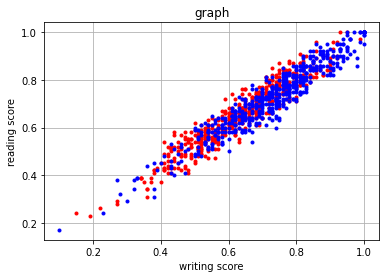

In [3]:
import matplotlib.pyplot as plt

temp1 = data.loc[data['gender'] == 1]
temp2 = data.loc[data['gender'] == 0]
x = temp1['writing score']
y = temp1['reading score']
plt.plot(x, y,'.r')

x = temp2['writing score']
y = temp2['reading score']
plt.plot(x, y,'.b')


plt.xlabel('writing score')
plt.ylabel('reading score')
plt.title('graph')
plt.grid(True)

plt.show()

Train & Evaluate with a simple SGD Classifier:  
&middot; "l1" worked best for penalty  
&middot; using polynomial features did not improve the score (without any more change to the data)

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(SGDClassifier(loss="hinge", penalty="l1", max_iter=100)).fit(Xtrain,Ytrain)
scores = cross_val_score(clf,Xtrain,Ytrain,cv=5)

print("Original Xtrain:")
print("Cross validation Score:",scores.mean(),"+/-",scores.std() * 2)
print("Test sample Score:",clf.score(Xtest,Ytest),"\n")

Original Xtrain:
Cross validation Score: 0.8512500000000001 +/- 0.025495097567963892
Test sample Score: 0.9 



Train & Evaluate with tensorflow:  
&middot; simple dense nn  
&middot; you can choose any number of layers and layer size  
&middot; this example work nicely with epochs=100-200  
&middot; add Dropout or other regularization to avoid overfitting

In [5]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[16]),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 12)                204       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 440
Trainable params: 440
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(Xtrain, Ytrain, epochs=100, validation_split=0.2)
model.evaluate(Xtest, Ytest)

Epoch 1/100
20/20 [==============================] - 0s 12ms/step - loss: 0.6958 - accuracy: 0.5094 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5344 - val_loss: 0.6957 - val_accuracy: 0.4750
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5437 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5547 - val_loss: 0.6929 - val_accuracy: 0.4938
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5625 - val_loss: 0.6927 - val_accuracy: 0.4875
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5625 - val_loss: 0.6923 - val_accuracy: 0.5125
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.5766 - val_loss: 0.6920 - val_accuracy: 0.5250
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3491 - accuracy: 0.8672 - val_loss: 0.4324 - val_accuracy: 0.8188
Epoch 60/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3473 - accuracy: 0.8609 - val_loss: 0.4260 - val_accuracy: 0.8188
Epoch 61/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8797 - val_loss: 0.4183 - val_accuracy: 0.8125
Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8781 - val_loss: 0.4215 - val_accuracy: 0.8313
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8844 - val_loss: 0.4036 - val_accuracy: 0.8313
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8922 - val_loss: 0.3970 - val_accuracy: 0.8250
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8828 - val_loss: 0.4044 - val_accuracy: 0.8188
Epoch 

[0.33388763666152954, 0.8550000190734863]